<div style="display: block; width: 100%; text-align: center">
    <h2><font color="orange">Quantum</font> <font color="tomato"> Fourier Transform</font></h2>
</div>

<div style="display: block; width: 100%; text-align: center">
    <h3><font color="green">1. The Fourier Transform Alorithm</h3>
</div>

> We have the time domain CSV data of a 1s clip of C-maj chord played in a piano. Using Fourier Transform, we will try to figure out that the chord is made up of C, E and G. I wonder if math can teach machines music then how far is the day when it can teach machines emotions!

In [205]:
import pandas as pd
import matplotlib.pyplot as plt
import math as m

In [206]:
sound_data = pd.read_csv("./assets/waveform.csv", header=None)
sound_data

,0,1
0,0.00000,-0.46933
1,0.00002,-0.46011
2,0.00005,-0.44931
3,0.00007,-0.41455
4,0.00009,-0.38632
...,...,...
44095,0.99989,0.10355
44096,0.99991,0.11536
44097,0.99993,0.12177
44098,0.99995,0.12454


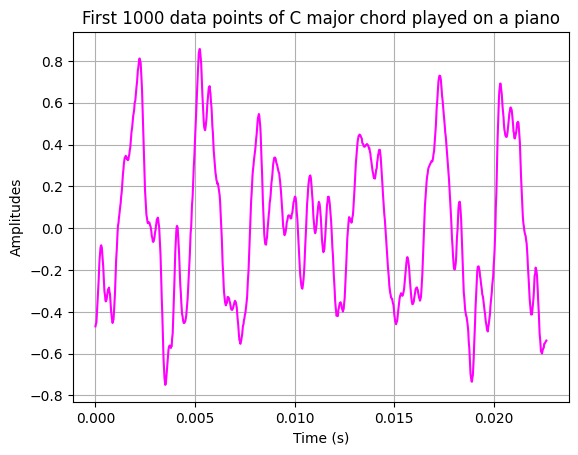

In [207]:
up = 1000
plt.title(f"First {up} data points of C major chord played on a piano")
plt.plot(sound_data[0][:up], sound_data[1][:up], c='magenta')
plt.grid()
plt.xlabel("Time (s)")
plt.ylabel("Amplitudes")
plt.show()

> ### The formula of Fourier Transform
> The formula for Discrete Fourier Transform is:\
> $$\displaystyle\phi_k = \frac{1}{\sqrt{N}}\sum_{j=0}^{N-1}{a_j e^{2\pi ijk/N}}$$
> Where,\
> $N$ is the number of total data points. Here we have $44100$ points in the 1s clip.\
> So, if there are $N$ data points then we have to calculate $\phi_0, \phi_1, \dots, \phi_{N-1}$. Here is an example workout to make things more clear.

> ### Demystifying the daunting Fourier Transform formula
> Consider a sequence of four points:\
> $\displaystyle a_0 = 0.841,$\
> $a_1 = 0.909,$\
> $a_2 = 0.141,$\
> $a_3 = -0.757$\
> We will calculate the corresponding $\phi_0, \phi_1, \phi_2, \text{and }\phi_3$.
>
> $$\displaystyle\phi_0=\frac{1}{\sqrt{4}}(0.841e^{2\pi i(0)(0)/4}+0.909e^{2\pi i(1)(0)/4}+0.141e^{2\pi i(2)(0)/4}-0.757e^{2\pi i(3)(0)/4}) = 0.567$$
> $$\displaystyle\phi_0=\frac{1}{\sqrt{4}}(0.841e^{2\pi i(0)(1)/4}+0.909e^{2\pi i(1)(1)/4}+0.141e^{2\pi i(2)(1)/4}-0.757e^{2\pi i(3)(1)/4}) = 0.35+0.833i$$
> $$\displaystyle\phi_0=\frac{1}{\sqrt{4}}(0.841e^{2\pi i(0)(2)/4}+0.909e^{2\pi i(1)(2)/4}+0.141e^{2\pi i(2)(2)/4}-0.757e^{2\pi i(3)(2)/4}) = 0.415$$
> $$\displaystyle\phi_0=\frac{1}{\sqrt{4}}(0.841e^{2\pi i(0)(3)/4}+0.909e^{2\pi i(1)(3)/4}+0.141e^{2\pi i(2)(3)/4}-0.757e^{2\pi i(3)(3)/4}) = 0.35−0.833i$$
>
> After finding those $\phi$ values, we need to take their norm as they can be complex numbers. So,\
> $$\displaystyle |\phi_0|=|0.567|=0.567$$\
> $$\displaystyle |\phi_1|=|0.35+0.833i|=\sqrt{(0.35)^2+(0.833)^2}=0.816$$\
> $$\displaystyle |\phi_2|=|0.415|=0.451$$\
> $$\displaystyle |\phi_3|=|0.35−0.833i|=\sqrt{(0.35)^2+(0.833)^2}=0.816$$
> 
> **Note,** one thing which may not be very clear from this workout is that, for $N$ data points, we are calculating $\phi_0, \dots, \phi_{N-1}$. These values show an important characteristics, that is: $\displaystyle \phi_k=\phi^*_{N-k}$. Only $\phi_0$ and $\phi_{(N/2)}$ is unique, all the other values are complex conjugates of each other. So, now if we plot $k$ and $\phi_k$, where $k\in[0, N/2]$ in the x and y axis respectively, we have our time domain data in the frequency domain.

In [257]:
def func(x):
    # print(x)
    pass
def FourierTransform(data):
    # N, freq = len(data), {}
    
    # for i in data:
    #     phi = 0
    #     for j in data:
    #         phi += data
    #     phi /= m.sqrt(N)
    #     freq["i"] = phi
    # return freq
    df = data.copy()
    df = df.head()
    # print(df)
    df.apply(func, axis=1)
    return df
    # print("After apply():\n")
    # print(df)

print(sound_data.head())
print("After apply():\n")
print(FourierTransform(sound_data))
# print(df)

         0        1
0  0.00000 -0.46933
1  0.00002 -0.46011
2  0.00005 -0.44931
3  0.00007 -0.41455
4  0.00009 -0.38632
After apply():

         0        1
0  0.00000 -0.46933
1  0.00002 -0.46011
2  0.00005 -0.44931
3  0.00007 -0.41455
4  0.00009 -0.38632
